<a href="https://colab.research.google.com/github/SimplySonu/Customer-Segmentation/blob/main/Exposys_DataLab_Sonu_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation Using K Means Clustering.**<br>
Marketing segmentation is the process of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers (known as segments) based on some type of shared characteristics. <br> <br>

The most common ways in which businesses segment their customer base are:<br>

<p><b>Demographic information</b> such as gender, age, familial and marital status, income, education, and occupation.<p>
<p><b>Geographical information</b> which differs depending on the scope of the company. For localized businesses, this info might pertain to specific towns or counties. For larger companies, it might mean a customer’s city, state, or even country of residence.
<p><b>Psychographics</b> such as social class, lifestyle, and personality traits.
<p><b>Behavioral data</b> such as spending and consumption habits, product/service usage, and desired benefits.<br>
<br>
<b>How it help companies to scale their business</b><br>
You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. 
<br><br>
This project is all about understanding the customers like who are the target/potential customers that will help us to understand our customers and plan the strategy accordingly.

**Algorithm used in this project to identify the Customer Segmentation *K mean clustering*.**<br>

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. 

**Modules used in this project**<br>
1) scikit-learn<br>
2) seaborn<br>
3) numpy<br>
4) pandas<br>
5) matplotlib<br> 

In [ ]:
#Importing all the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

In [ ]:
#Loading the data set and printing the first five records
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Exploring the data set**

In [ ]:
# Dropping customer id column since it is irrelevent to our project.
df.drop(["CustomerID"], axis = 1, inplace=True)
df.columns=["Gender","Age","Income","Spending_Score"]
df.head()

,Gender,Age,Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Income          200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
# Displaying the Description of the dataset
df.describe()

,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
male_annualIncome = sum(df["Income"][df["Gender"] == "Male"])
female_annualIncome = sum(df["Income"][df["Gender"] == "Female"])
male_spendingScore = sum(df["Spending_Score"][df["Gender"] == "Male"])
female_spendingScore = sum(df["Spending_Score"][df["Gender"] == "Female"])
print("Male Annual Income:-",male_annualIncome)
print("Female Annual Income:-",female_annualIncome)
print("Male Spending Score:-",male_spendingScore)
print("Female Spending Score:-",female_spendingScore)

Male Annual Income:- 5476
Female Annual Income:- 6636
Male Spending Score:- 4269
Female Spending Score:- 5771


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Male and Female Count')

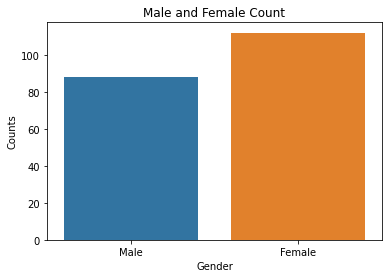

In [ ]:
# Count plot for total male and female customers
sns.countplot(df["Gender"])
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title("Male and Female Count")



The Below graph shows that the spending score(expenditure) is more than the annual earning.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


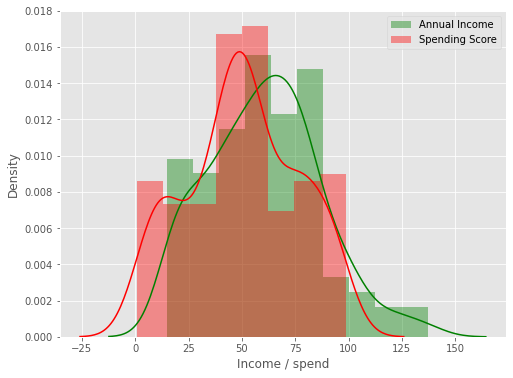

In [ ]:
# distpolt for spending score and income
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.distplot(df["Income"],color="green",label="Annual Income")
sns.distplot(df["Spending_Score"],color="red",label="Spending Score")
plt.xlabel('Income / spend')
plt.legend()
plt.show()


In the below graph we can clearly see that the spending score is greater the the Annual Income and their distribution with the help of box plot

Text(0, 0.5, '')

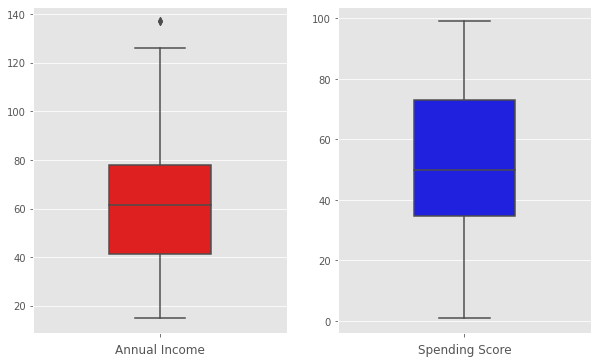

In [ ]:
# box plot to see the distribution of annual and spending score
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Income"],color ="red",width=0.4)
plt.xlabel("Annual Income")
plt.ylabel("")
plt.subplot(1,2,2)
sns.boxplot(y=df["Spending_Score"],color = "blue",width=0.4)
plt.xlabel("Spending Score")
plt.ylabel("")

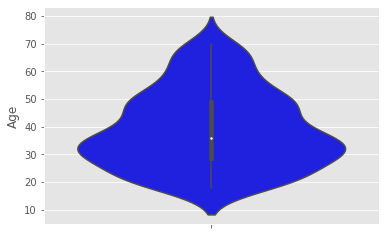

In [ ]:
# Violine plot for total age distribution
sns.violinplot(y=df["Age"],color="blue")

In the below graph we can clearly see that the 26–35 age group outweighs every other age group. The same was shown in the violine plot above

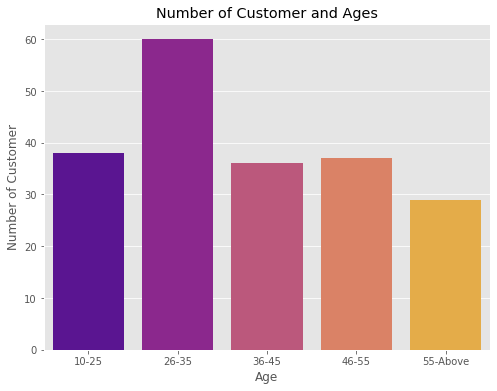

In [ ]:
# Bar chart for age comparison
age18_25 = df["Age"][(df["Age"] <= 25) & (df["Age"] >= 10)]
age26_35 = df["Age"][(df["Age"] <= 35) & (df["Age"] >= 26)]
age36_45 = df["Age"][(df["Age"] <= 45) & (df["Age"] >= 36)]
age46_55 = df["Age"][(df["Age"] <= 55) & (df["Age"] >= 46)]
age55above = df["Age"][df["Age"] >= 56]

xlabel = ["10-25","26-35","36-45","46-55","55-Above"]
y = [len(age18_25),len(age26_35),len(age36_45),len(age46_55),len(age55above)]

plt.figure(figsize=(8,6))
sns.barplot(x=xlabel, y=y, palette="plasma")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()



In the below graph we can see the ages distribution and ther spending score with the help of box plot

Text(0.5, 1.0, 'Age Distribution for Spending Score above80')

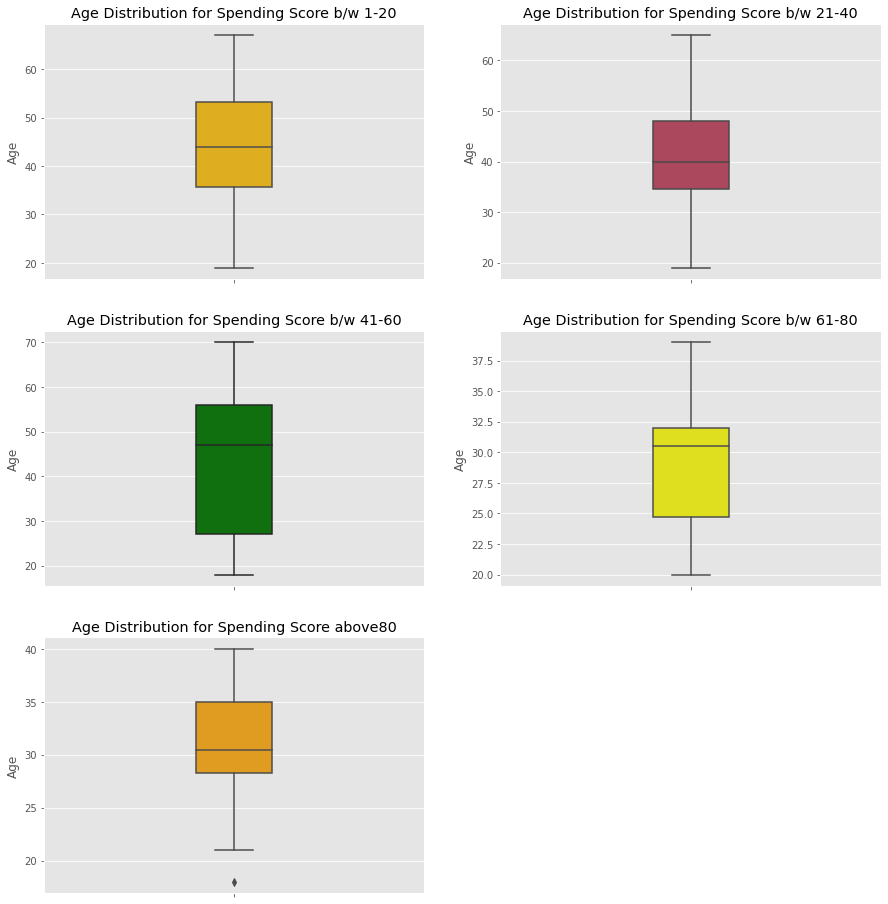

In [ ]:
# Box plot for age distribution and spending score between all range
ss1_20_age = df["Age"][(df["Spending_Score"] >= 1) & (df["Spending_Score"] <= 20)]
ss21_40_age = df["Age"][(df["Spending_Score"] >= 21) & (df["Spending_Score"] <= 40)]
ss41_60_age = df["Age"][(df["Spending_Score"] >= 41) & (df["Spending_Score"] <= 60)]
ss61_80_age = df["Age"][(df["Spending_Score"] >= 61) & (df["Spending_Score"] <= 80)]
ss81_100_age = df["Age"][(df["Spending_Score"] >= 81)]

plt.figure(figsize=(15,16))
plt.subplot(3,2,1)
plt.title("Age Distribution for Spending Score b/w 1-20")
sns.boxplot(y =ss1_20_age,width =0.2,color = "blue",palette="Wistia_r")
plt.subplot(3,2,2)
sns.boxplot(y =ss21_40_age,width =0.2,color = "red",palette="inferno")
plt.title("Age Distribution for Spending Score b/w 21-40")
plt.subplot(3,2,3)
sns.boxplot(y =ss41_60_age,width =0.2,color = "green")
plt.title("Age Distribution for Spending Score b/w 41-60")
plt.subplot(3,2,4)
sns.boxplot(y =ss61_80_age,width =0.2,color = "yellow")
plt.title("Age Distribution for Spending Score b/w 61-80")
plt.subplot(3,2,5)
sns.boxplot(y =ss81_100_age,width =0.2,color = "orange")
plt.title("Age Distribution for Spending Score above80")

The blow graph gives the details of number of customers according to their annual income. The majority of the customers have annual income in the range 60000 and 90000.

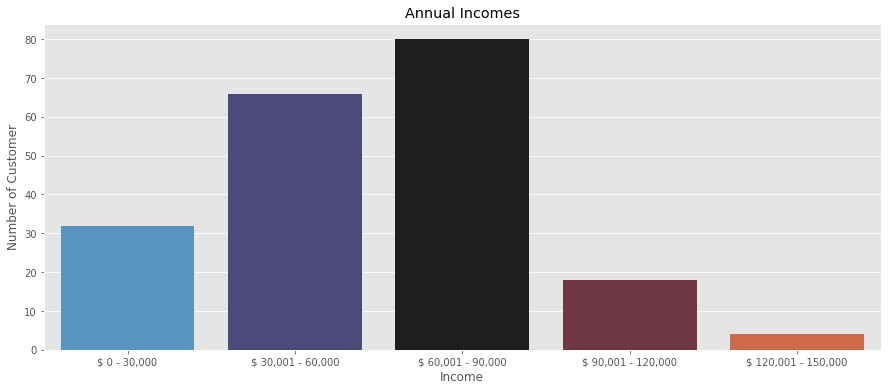

In [ ]:

ai0_30 = df["Income"][(df["Income"] >= 0) & (df["Income"] <= 30)]
ai31_60 = df["Income"][(df["Income"] >= 31) & (df["Income"] <= 60)]
ai61_90 = df["Income"][(df["Income"] >= 61) & (df["Income"] <= 90)]
ai91_120 = df["Income"][(df["Income"] >= 91) & (df["Income"] <= 120)]
ai121_150 = df["Income"][(df["Income"] >= 121) & (df["Income"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30), len(ai31_60), len(ai61_90), len(ai91_120), len(ai121_150)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="icefire")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

K-Mean Algorithm

The below graph specifies the distribution of spending score and income for 3 (i.e. k=3) clusters but that is not the optimal cluster value, we’ll find the optimal clusters with the help Elbow method.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 576x432 with 0 Axes>

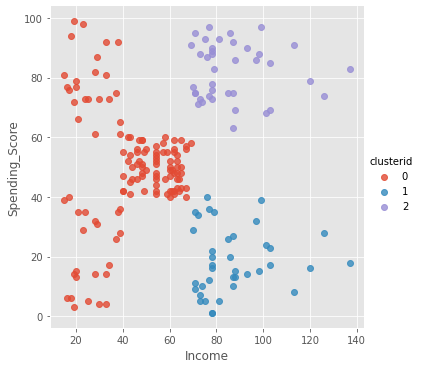

In [ ]:

from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(df.iloc[:,1:])
df["clusterid"] = clusters.labels_
plt.figure(figsize=(8,6))
sns.lmplot("Income","Spending_Score",data =df,hue ="clusterid",fit_reg =False)

Finding the optimum number of clusters that may exist using Elbow Method. Trying with number of clusters from 1 to 10. In each case print the total variance using "inertia" parameter of the clusters. 

The figure indicates the elbow point is 5, this means there might exist five clusters in the data set. 

Text(0, 0.5, 'sum of squared errors')

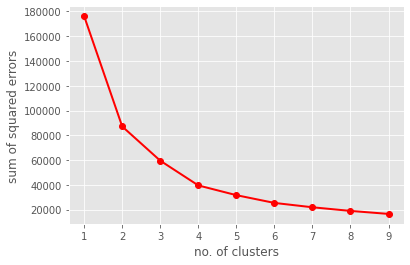

In [ ]:
cluster_range =range(1,10)
cluster_error = []
for num_clusters in cluster_range:
  clusters =KMeans(num_clusters)
  clusters.fit(df.iloc[:,1:-2])
  cluster_error.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_error,marker="o",linewidth=2, color="red")
plt.xlabel("no. of clusters")
plt.ylabel("sum of squared errors")

Fitting the model for cluster value 5 (optimal point)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 576x432 with 0 Axes>

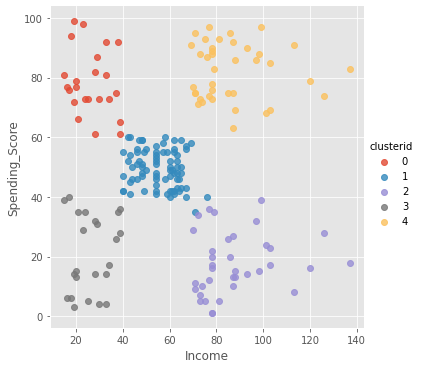

In [ ]:
clusters = KMeans(5)
clusters.fit(df.iloc[:,1:])
df["clusterid"] = clusters.labels_
plt.figure(figsize=(8,6))
sns.lmplot("Income","Spending_Score",data =df,hue ="clusterid",fit_reg =False)

plot to visualize the spending score of the customers with their annual income with respect to their age. The data are divided into 5 clusters and shown in the plot


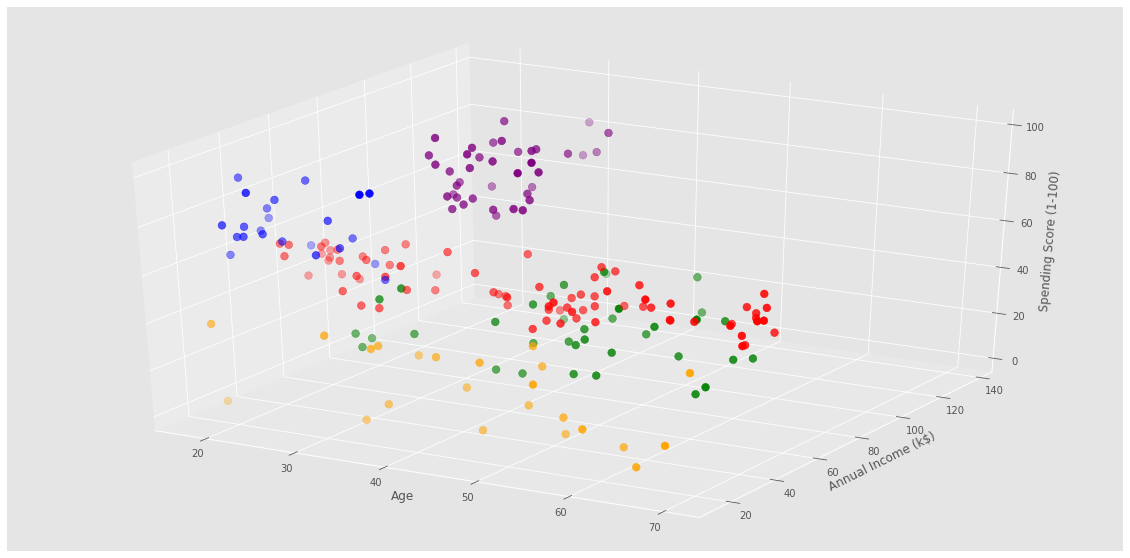

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.clusterid == 0], df["Income"][df["clusterid"] == 0], df["Spending_Score"][df["clusterid"] == 0], c='blue', s=60)
ax.scatter(df.Age[df.clusterid == 1], df["Income"][df["clusterid"] == 1], df["Spending_Score"][df["clusterid"] == 1], c='red', s=60)
ax.scatter(df.Age[df.clusterid == 2], df["Income"][df["clusterid"] == 2], df["Spending_Score"][df["clusterid"] == 2], c='green', s=60)
ax.scatter(df.Age[df.clusterid == 3], df["Income"][df["clusterid"] == 3], df["Spending_Score"][df["clusterid"] == 3], c='orange', s=60)
ax.scatter(df.Age[df.clusterid == 4], df["Income"][df["clusterid"] == 4], df["Spending_Score"][df["clusterid"] == 4], c='purple', s=60)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()